# Lab 9

## Pipelines

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe_short = make_pipeline(MinMaxScaler(), SVC())



In [2]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler()), ('svc', SVC())]

In [3]:
from sklearn.preprocessing import Normalizer
pipe = make_pipeline(MinMaxScaler(), Normalizer(), MinMaxScaler())
pipe.steps

[('minmaxscaler-1', MinMaxScaler()),
 ('normalizer', Normalizer()),
 ('minmaxscaler-2', MinMaxScaler())]

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
cancer.target, random_state=42)
pipe = make_pipeline(MinMaxScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9790209790209791

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],
'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Test set score:", grid.score(X_test, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.9741450068399453
Test set score: 0.986013986013986
Best parameters: {'svc__C': 10, 'svc__gamma': 0.1}


In [6]:
grid.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=10, gamma=0.1))])

In [7]:
grid.best_estimator_.named_steps

{'minmaxscaler': MinMaxScaler(), 'svc': SVC(C=10, gamma=0.1)}

In [8]:
grid.best_estimator_.named_steps["svc"]

SVC(C=10, gamma=0.1)

In [9]:
grid.best_estimator_.named_steps["svc"].n_support_

array([31, 36], dtype=int32)

## The KFold Class

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
iris = load_iris()
svm = SVC()
cross_val_score(svm, iris.data, iris.target)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [11]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [12]:
kf.get_n_splits()

5

In [13]:
for rest_index, fold_index in kf.split(iris.data):
    X_rest, X_fold = iris.data[rest_index], iris.data[fold_index]
    y_rest, y_fold = iris.target[rest_index], iris.target[fold_index]
    svm.fit(X_rest,y_rest)
    print(svm.score(X_fold,y_fold))

1.0
1.0
0.9333333333333333
0.9333333333333333
0.9666666666666667


## Exercise 1

In [14]:
for rest_index, fold_index in kf.split(iris.data):
    print("Current fold:", fold_index)
    print("The rest of the training set:", rest_index)
    X_rest, X_fold = iris.data[rest_index], iris.data[fold_index]
    y_rest, y_fold = iris.target[rest_index], iris.target[fold_index]
    svm.fit(X_rest,y_rest)
    # print(svm.score(X_fold,y_fold))

Current fold: [  9  12  18  19  26  29  30  31  36  45  55  56  64  68  69  73  76  78
  82 104 108 110 118 127 128 131 132 141 143 145]
The rest of the training set: [  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  27  28  32  33  34  35  37  38  39  40  41  42  43  44
  46  47  48  49  50  51  52  53  54  57  58  59  60  61  62  63  65  66
  67  70  71  72  74  75  77  79  80  81  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107 109 111
 112 113 114 115 116 117 119 120 121 122 123 124 125 126 129 130 133 134
 135 136 137 138 139 140 142 144 146 147 148 149]
Current fold: [  0   4  10  11  15  16  22  27  28  32  40  42  44  51  60  65  66  67
  75  81  85  86  96 105 109 122 133 137 142 146]
The rest of the training set: [  1   2   3   5   6   7   8   9  12  13  14  17  18  19  20  21  23  24
  25  26  29  30  31  33  34  35  36  37  38  39  41  43  45  46  47  48
  49  50  52  53  54  55  56  57

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=6, random_state=42)
svm = SVC()
svm.fit(X_train, y_train)
svm.decision_function(X_test[0:2])

array([[-0.2158595 ,  2.18568275,  1.1223534 ],
       [ 2.20412187,  0.93986322, -0.19206811]])

In [16]:
y_test[0:2]

array([1, 0])

In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=42,
hidden_layer_sizes=[10]).fit(X_train,y_train)
mlp.fit(X_train, y_train)
mlp.predict_proba(X_test[0:2])

array([[3.21916560e-04, 9.94931232e-01, 4.74685165e-03],
       [9.99928067e-01, 7.18875878e-05, 4.53995200e-08]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
iris.target, random_state=42)

In [19]:
import math
import numpy as np
def dist(x1,x2):
    return np.linalg.norm(x1-x2)
n_train = X_train.shape[0]
n_test = X_test.shape[0]
dist_own = math.inf * np.ones(n_train)
dist_other = math.inf * np.ones(n_train)
for i in range(n_train-1):
    for j in range(i+1,n_train):
        current_dist = dist(X_train[i],X_train[j])
    if y_train[i]==y_train[j]:
        if (current_dist < dist_own[i]):
            dist_own[i] = current_dist
        if (current_dist < dist_own[j]):
            dist_own[j] = current_dist
    else:
        if (current_dist < dist_other[i]):
            dist_other[i] = current_dist
        if (current_dist < dist_other[j]):
            dist_other[j] = current_dist

In [20]:
score = np.zeros(n_train+1)
p = np.zeros((n_test,3)) # the p-values
for j in range(n_test):
    for l in range(3): # postulated label
        aug_dist_own = np.append(dist_own,math.inf)
        aug_dist_other = np.append(dist_other,math.inf)
        for i in range(n_train):
            current_dist = dist(X_train[i],X_test[j])
            if y_train[i]==l:
                if (current_dist < aug_dist_own[i]):
                    aug_dist_own[i] = current_dist
                if (current_dist < aug_dist_own[n_train]):
                    aug_dist_own[n_train] = current_dist
            else:
                if (current_dist < aug_dist_other[i]):
                    aug_dist_other[i] = current_dist
                if (current_dist < aug_dist_other[n_train]):
                    aug_dist_other[n_train] = current_dist

        for i in range(n_train+1):
            if aug_dist_own[i] == 0:
                score[i] = math.inf
                if (aug_dist_other[i] == 0):
                    score[i] = 0
            else:
                score[i] = aug_dist_other[i] / aug_dist_own[i]
        p[j,l] = np.mean(score<=score[n_train])

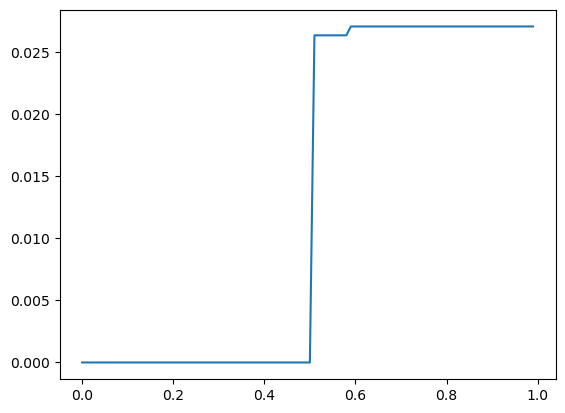

In [21]:
import matplotlib.pyplot as plt
eps = np.zeros(100) # a range of significance levels
err = np.zeros(100) # the corresponding error rates
for k in range(100):
    eps[k] = k/100 # considering eps = k%
    err[k] = 0 # initializing the error rate
    for j in range(n_test):
        if (p[j,y_test[j]] <= eps[k]): # if we made an error
            err[k] = err[k] + 1 # count this error
            err[k] = err[k] / n_test # number of errors -> error rate
plt.plot(eps,err)
plt.show()